In [1]:
## importing all the important libraries.

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# uploading the dataset
# sometime dataset does not upload properly and return error " to avoid that use ncoding='latin1'".

df = pd.read_csv("Global_Superstore2.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [4]:
df.shape

(51290, 24)

In [5]:
# checking the null values.

df.isnull().sum()



Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
df["Postal Code"].fillna(0, inplace=True)
df["Postal Code"]

0        10024.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
51285        0.0
51286    77095.0
51287    93030.0
51288        0.0
51289        0.0
Name: Postal Code, Length: 51290, dtype: float64

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
## finding the sales in region.
# highest sale will come first 

region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales

Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Central'),
  Text(1, 0, 'South'),
  Text(2, 0, 'North'),
  Text(3, 0, 'Oceania'),
  Text(4, 0, 'Southeast Asia'),
  Text(5, 0, 'North Asia'),
  Text(6, 0, 'EMEA'),
  Text(7, 0, 'Africa'),
  Text(8, 0, 'Central Asia'),
  Text(9, 0, 'West'),
  Text(10, 0, 'East'),
  Text(11, 0, 'Caribbean'),
  Text(12, 0, 'Canada')])

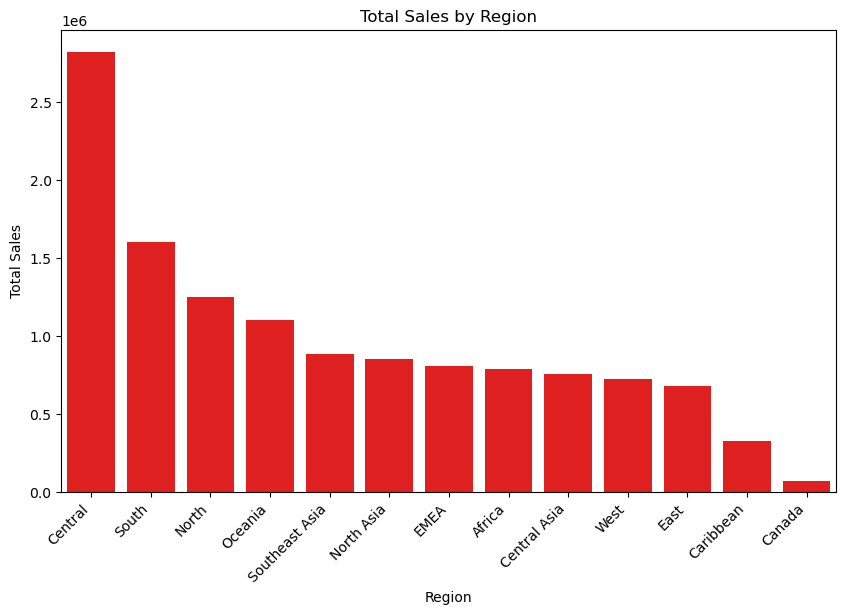

In [9]:
from typing import Any
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values,color='r')
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45, ha='right')

In [10]:
# finding the top customer

top_customer = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)[:10]
top_customer

Customer Name
Tom Ashbrook          40488.07080
Tamara Chand          37457.33300
Greg Tran             35550.95428
Christopher Conant    35187.07640
Sean Miller           35170.93296
Bart Watters          32310.44650
Natalie Fritzler      31781.25850
Fred Hopkins          30400.67452
Jane Waco             30288.45030
Hunter Lopez          30243.56658
Name: Sales, dtype: float64

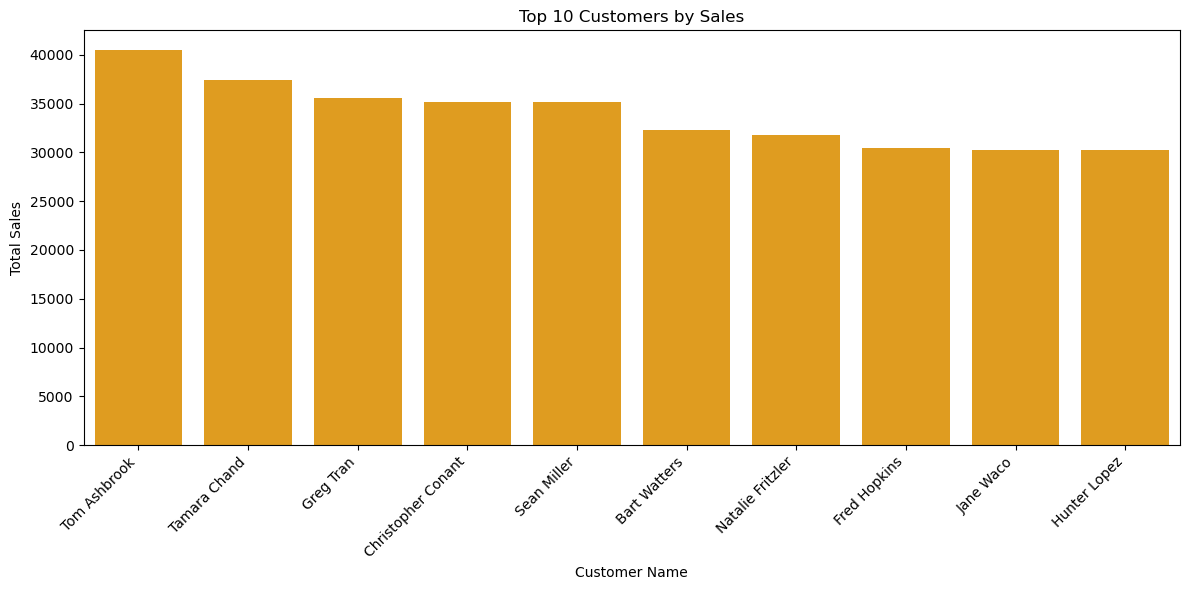

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customer.index, y=top_customer.values, color='orange')

plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")

plt.xticks(rotation=45, ha='right')  # Rotate x labels to prevent overlap
plt.tight_layout()  # Adjust layout so labels don't get cut off
plt.show()


In [12]:
# let find the most profit given by which category.

top_profit_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
top_profit_category

Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

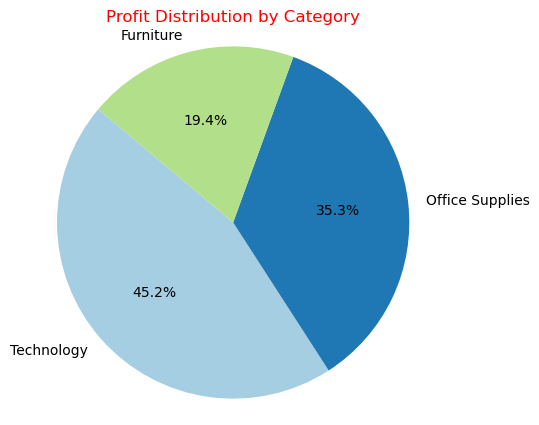

In [21]:
# Pie plot
plt.figure(figsize=(5, 5))
plt.pie(top_profit_category, labels=top_profit_category.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Profit Distribution by Category",color='r')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


In [23]:
ship_mode = df["Ship Mode"].value_counts()
ship_mode

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

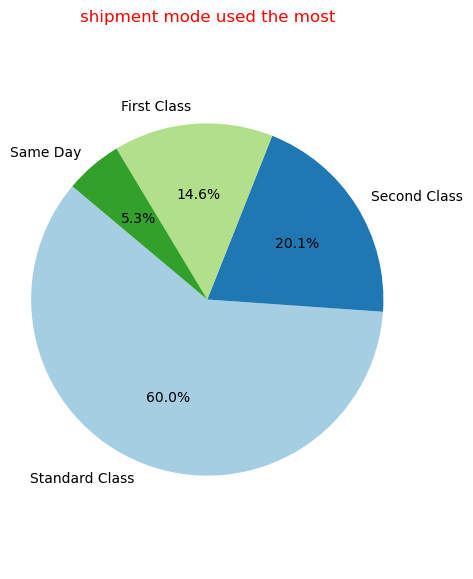

In [25]:
plt.figure(figsize=(5,7))
plt.pie(ship_mode, labels=ship_mode.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("shipment mode used the most",color='r')
plt.axis('equal')
plt.show()

In [27]:

product_summary = df.groupby("Product Name").agg({
    'Discount': 'mean',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Filter: High Discount (> 20%) and Low Profit (< 0)
filtered_products = product_summary[
    (product_summary['Discount'] > 0.2) &
    (product_summary['Profit'] < 0) &
    (product_summary['Quantity'] > product_summary['Quantity'].mean())
]

# Display the filtered products
print(filtered_products.sort_values(by='Discount', ascending=False))


                                           Product Name  Discount     Profit  \
1520  GBC Standard Recycled Report Covers, Clear Pla...  0.491667  -27.16560   
2789  Pressboard Hanging Data Binders for Unburst Sh...  0.440000  -10.13520   
3395                           Tenex Door Stop, Durable  0.328000 -521.91520   
2013                      Ikea Library with Doors, Pine  0.263214 -277.95120   
2062                            Jiffy Mailers, Recycled  0.258235 -165.17290   
...                                                 ...       ...        ...   
1348                          Epson Card Printer, White  0.201538 -152.03880   
2268                    Logitech Memory Card, Erganomic  0.201111 -717.61250   
2495             Nokia Office Telephone, with Caller ID  0.200769 -186.30410   
1867                      Hon Rocking Chair, Set of Two  0.200645  -57.47280   
836                         Canon Copy Machine, Digital  0.200316 -861.79524   

      Quantity  
1520        51  
2789 

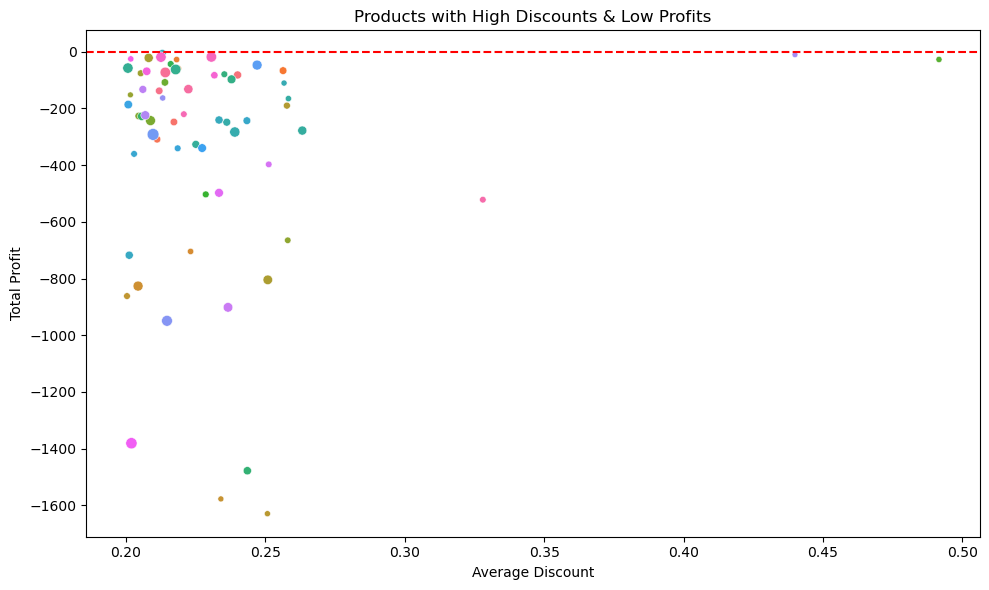

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_products,
    x="Discount",
    y="Profit",
    size="Quantity",
    hue="Product Name",
    legend=False
)
plt.title("Products with High Discounts & Low Profits")
plt.xlabel("Average Discount")
plt.ylabel("Total Profit")
plt.axhline(0, color='red', linestyle='--')  # profit=0 line
plt.tight_layout()
plt.show()


In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Year-Month column
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Year-Month and sum sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

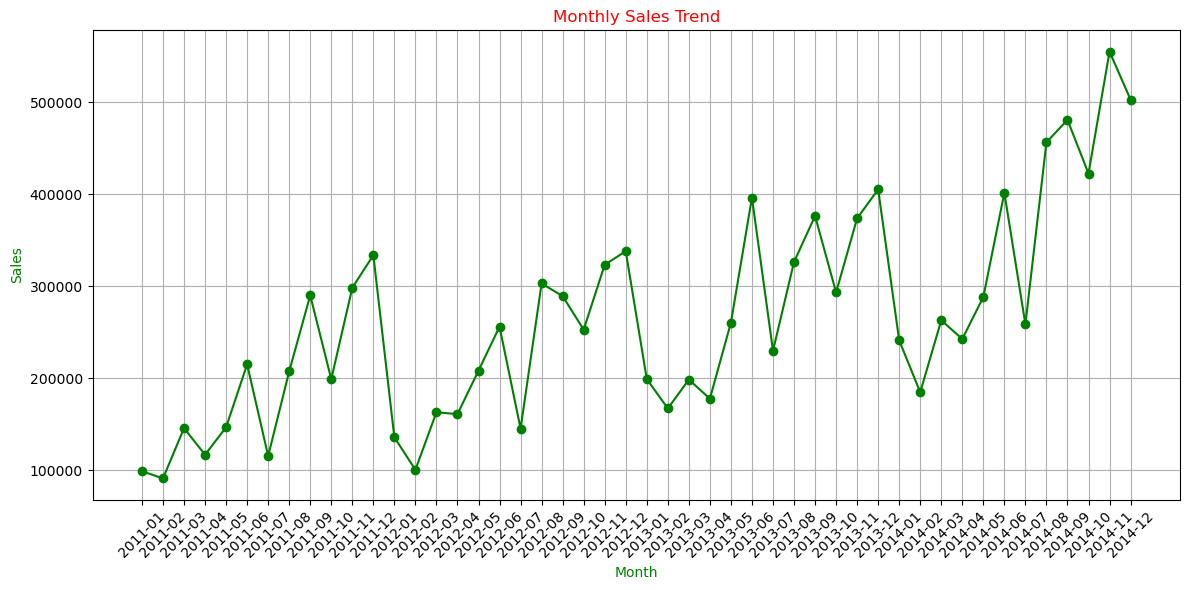

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o',color='green')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend",color='r')
plt.xlabel("Month",color='green')
plt.ylabel("Sales",color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

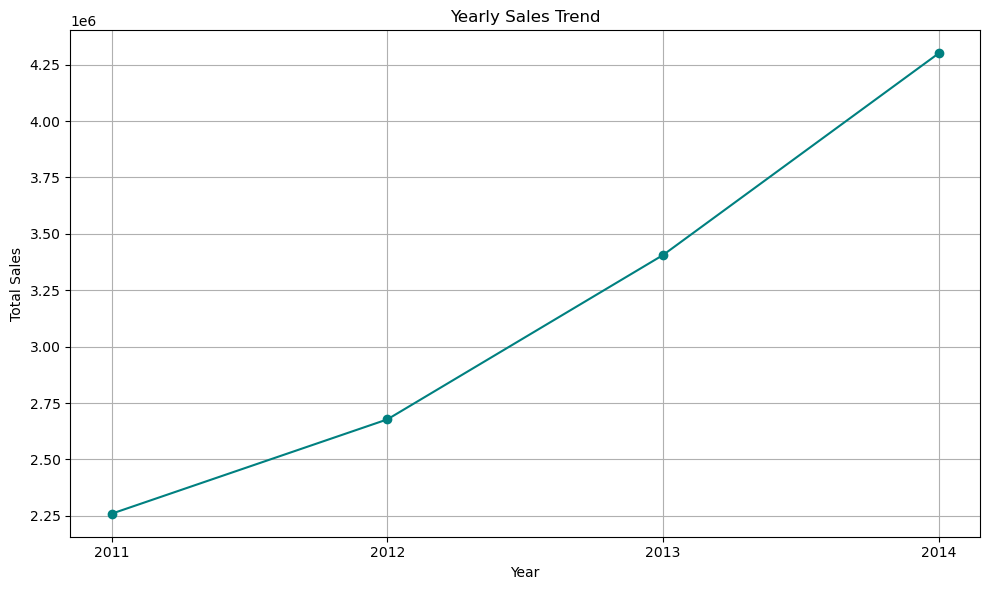

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', color='teal')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(yearly_sales['Year'])
plt.tight_layout()
plt.show()

In [41]:
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

print("Top Countries by Revenue:")
print(top_countries.head(10))


Top Countries by Revenue:
Country
United States     2.297201e+06
Australia         9.252359e+05
France            8.589311e+05
China             7.005620e+05
Germany           6.288400e+05
Mexico            6.225906e+05
India             5.896501e+05
United Kingdom    5.285763e+05
Indonesia         4.048875e+05
Brazil            3.611064e+05
Name: Sales, dtype: float64


In [43]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

print("Top States by Revenue:")
print(top_states.head(10))

Top States by Revenue:
State
England                   485170.9710
California                457687.6315
Ile-de-France             317822.5440
New York                  310876.2710
New South Wales           270487.1040
Queensland                238312.7340
North Rhine-Westphalia    216451.8510
Texas                     170188.0458
San Salvador              153639.3970
National Capital          152175.3555
Name: Sales, dtype: float64


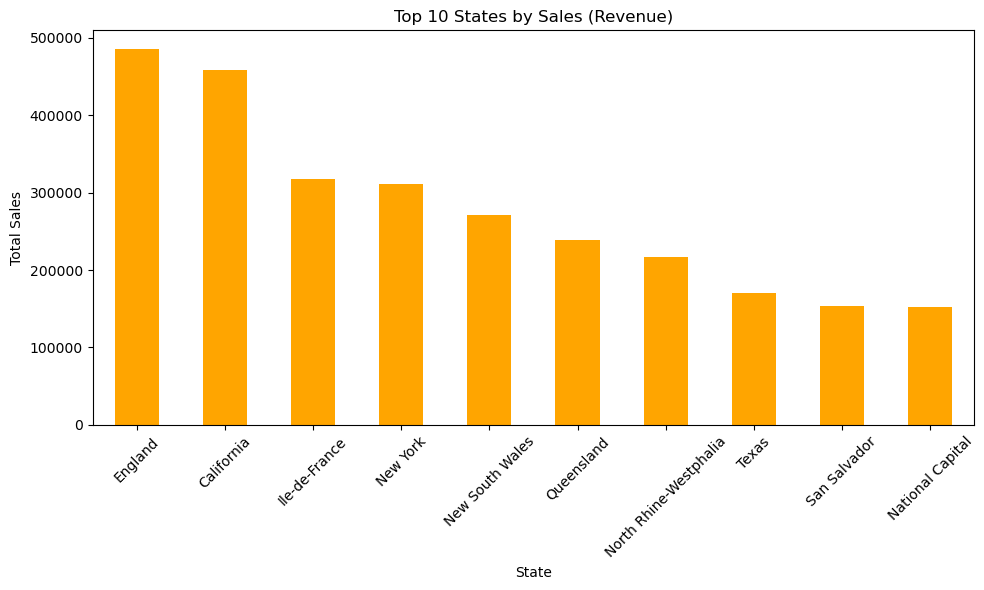

In [45]:
top_states.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Top 10 States by Sales (Revenue)")
plt.ylabel("Total Sales")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()